### 구간추정이 필요한 이유
* 점추정은 "딱 이 값이다!"라고 말하지만, 항상 오차가 있음
* 구간추정은 "이 범위 안에 있을 것이다"라고 말함
* 더 현실적이고 신뢰할 수 있는 방법

### 신뢰구간
모수가 포함될 것으로 기대되는 구간
* 95% 신뢰구간: 같은 방법으로 100번 표본을 뽑으면 약 95번은 실제 모수를 포함하는 구간
* 자주 하는 오해: 모두가 이 구간에 있을 확률 95% ❌
* 올바른 해석: 이 방법으로 구간을 만들면 95%는 모수를 포함

#### 신뢰구간 계산 (모분산을 알 때)
x̄ ± z * (σ / √n)
- x̄: 표본평균
- z: 신뢰수준에 따른 z값 (95%일 때 1.96)
- σ: 모표준편차
- n: 표본 크기

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# Mac 한글 폰트 설정
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False

In [2]:
# 1. 데이터 준비 (평균 키 170cm, 표준편차 10cm)
np.random.seed(42)
population_mean = 170
population_std = 10
sample_size = 30

sample_data = np.random.normal(population_mean, population_std, sample_size)

print("=== 표본 데이터 ===")
print(f"표본 크기: {sample_size}")
print(f"표본평균: {sample_data.mean():.2f}cm")
print(f"표본표준편차: {sample_data.std(ddof=1):.2f}cm")

=== 표본 데이터 ===
표본 크기: 30
표본평균: 168.12cm
표본표준편차: 9.00cm


In [3]:
# 2. 95% 신뢰구간 계산 (모표준편차를 아는 경우)
confidence_level = 0.95
z_score = stats.norm.ppf((1 + confidence_level) / 2)  # 1.96

margin_of_error = z_score * (population_std / np.sqrt(sample_size))
ci_lower = sample_data.mean() - margin_of_error
ci_upper = sample_data.mean() + margin_of_error

print(f"\n=== 95% 신뢰구간 (z-분포) ===")
print(f"신뢰구간: [{ci_lower:.2f}, {ci_upper:.2f}]")
print(f"오차한계: ±{margin_of_error:.2f}cm")
print(f"실제 모평균({population_mean}cm)이 구간에 포함: {ci_lower <= population_mean <= ci_upper}")


=== 95% 신뢰구간 (z-분포) ===
신뢰구간: [164.54, 171.70]
오차한계: ±3.58cm
실제 모평균(170cm)이 구간에 포함: True


In [4]:
# 3. 95% 신뢰구간 계산 (모표준편차를 모르는 경우 - 더 현실적)
t_score = stats.t.ppf((1 + confidence_level) / 2, df=sample_size-1)
t_margin = t_score * (sample_data.std(ddof=1) / np.sqrt(sample_size))
t_ci_lower = sample_data.mean() - t_margin
t_ci_upper = sample_data.mean() + t_margin

print(f"\n=== 95% 신뢰구간 (t-분포, 더 정확) ===")
print(f"신뢰구간: [{t_ci_lower:.2f}, {t_ci_upper:.2f}]")


=== 95% 신뢰구간 (t-분포, 더 정확) ===
신뢰구간: [164.76, 171.48]


In [5]:
print(f"오차한계: ±{t_margin:.2f}cm")

# 4. 여러 신뢰수준 비교
confidence_levels = [0.90, 0.95, 0.99]
print(f"\n=== 신뢰수준별 신뢰구간 비교 ===")

for conf in confidence_levels:
    z = stats.norm.ppf((1 + conf) / 2)
    margin = z * (population_std / np.sqrt(sample_size))
    lower = sample_data.mean() - margin
    upper = sample_data.mean() + margin
    width = upper - lower
    print(f"{int(conf*100)}% 신뢰구간: [{lower:.2f}, {upper:.2f}] (폭: {width:.2f}cm)")

오차한계: ±3.36cm

=== 신뢰수준별 신뢰구간 비교 ===
90% 신뢰구간: [165.12, 171.12] (폭: 6.01cm)
95% 신뢰구간: [164.54, 171.70] (폭: 7.16cm)
99% 신뢰구간: [163.42, 172.82] (폭: 9.41cm)


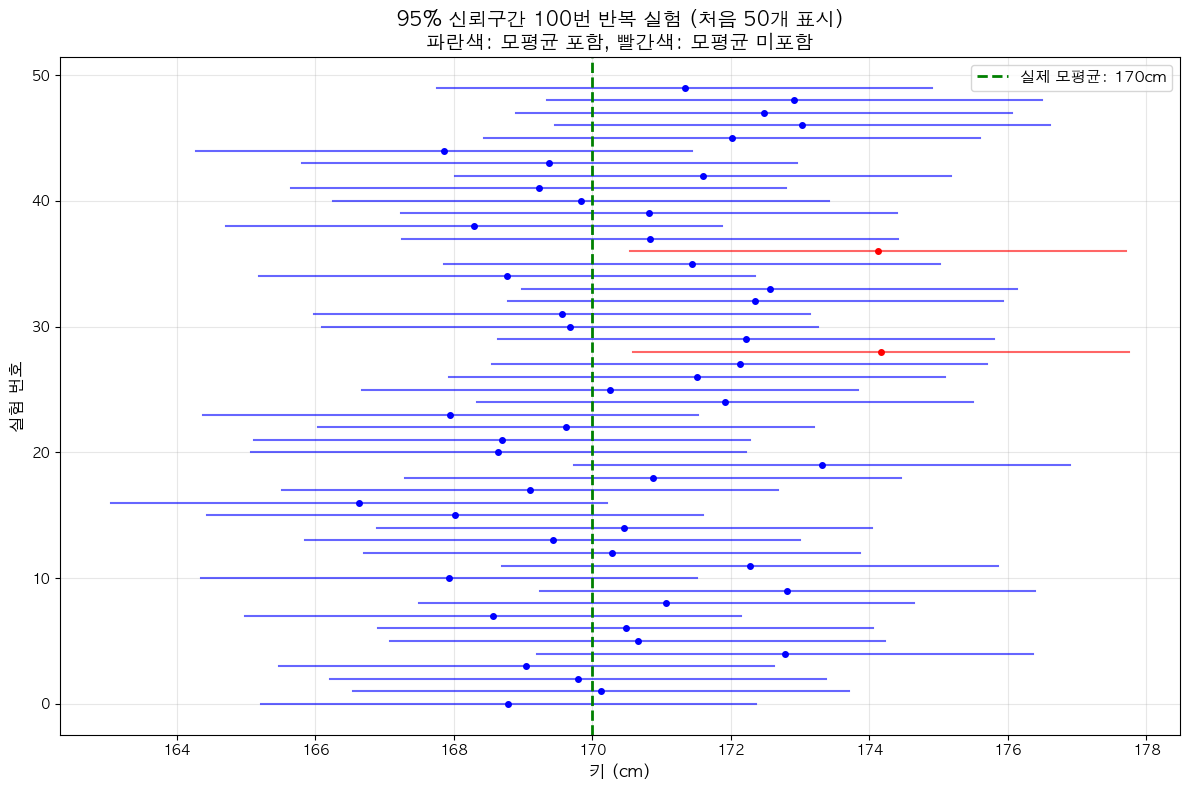

In [6]:
# 5. 신뢰구간 시각화 - 100번 반복 실험
num_experiments = 100
confidence_intervals = []
contains_true_mean = []

for i in range(num_experiments):
    sample = np.random.normal(population_mean, population_std, sample_size)
    sample_mean = sample.mean()
    margin = z_score * (population_std / np.sqrt(sample_size))
    ci_low = sample_mean - margin
    ci_high = sample_mean + margin
    
    confidence_intervals.append((ci_low, ci_high, sample_mean))
    contains_true_mean.append(ci_low <= population_mean <= ci_high)

# 시각화
plt.figure(figsize=(12, 8))

# 처음 50개만 표시
for i in range(50):
    ci_low, ci_high, s_mean = confidence_intervals[i]
    color = 'blue' if contains_true_mean[i] else 'red'
    plt.plot([ci_low, ci_high], [i, i], color=color, linewidth=1.5, alpha=0.6)
    plt.plot(s_mean, i, 'o', color=color, markersize=4)

plt.axvline(population_mean, color='green', linestyle='--', linewidth=2, label=f'실제 모평균: {population_mean}cm')
plt.xlabel('키 (cm)', fontsize=12)
plt.ylabel('실험 번호', fontsize=12)
plt.title('95% 신뢰구간 100번 반복 실험 (처음 50개 표시)\n파란색: 모평균 포함, 빨간색: 모평균 미포함', 
          fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [8]:
# 6. 결과 요약
success_rate = sum(contains_true_mean) / num_experiments * 100
print(f"\n=== 실험 결과 ===")
print(f"100번 중 {sum(contains_true_mean)}번 모평균 포함 ({success_rate:.1f}%)")
print(f"이론적 기대값: 95%")


=== 실험 결과 ===
100번 중 97번 모평균 포함 (97.0%)
이론적 기대값: 95%


In [9]:
# 7. 실습 문제
print("\n" + "="*50)
print("✏️ 실습 문제")
print("="*50)
print("1. 표본 크기를 100으로 늘리면 신뢰구간이 어떻게 변하나요?")
print("2. 신뢰수준을 99%로 높이면 신뢰구간이 넓어지나요, 좁아지나요?")
print("3. 1000번 반복했을 때 성공률은 95%에 가까운가요?")


✏️ 실습 문제
1. 표본 크기를 100으로 늘리면 신뢰구간이 어떻게 변하나요?
2. 신뢰수준을 99%로 높이면 신뢰구간이 넓어지나요, 좁아지나요?
3. 1000번 반복했을 때 성공률은 95%에 가까운가요?


In [14]:
# 1. 표본 크기를 100으로 늘리면 신뢰구간이 어떻게 변하나요?

sample_sizes = [30, 100]

for size in sample_sizes:
    print(f"\n샘플 사이즈: {size}")
    # 95% 신뢰구간 계산 (모표준편차를 아는 경우)
    confidence_level = 0.95
    z_score = stats.norm.ppf((1 + confidence_level) / 2)  # 1.96
    
    margin_of_error = z_score * (population_std / np.sqrt(size))
    ci_lower = sample_data.mean() - margin_of_error
    ci_upper = sample_data.mean() + margin_of_error
    
    print(f"\n=== 95% 신뢰구간 (z-분포) ===")
    print(f"신뢰구간: [{ci_lower:.2f}, {ci_upper:.2f}]")

    # 95% 신뢰구간 계산 (모표준편차를 모르는 경우 - 더 현실적)
    t_score = stats.t.ppf((1 + confidence_level) / 2, df=size-1)
    t_margin = t_score * (sample_data.std(ddof=1) / np.sqrt(size))
    t_ci_lower = sample_data.mean() - t_margin
    t_ci_upper = sample_data.mean() + t_margin
    
    print(f"\n=== 95% 신뢰구간 (t-분포, 더 정확) ===")
    print(f"신뢰구간: [{t_ci_lower:.2f}, {t_ci_upper:.2f}]")
# -> 더 좁아짐


샘플 사이즈: 30

=== 95% 신뢰구간 (z-분포) ===
신뢰구간: [164.54, 171.70]

=== 95% 신뢰구간 (t-분포, 더 정확) ===
신뢰구간: [164.76, 171.48]

샘플 사이즈: 100

=== 95% 신뢰구간 (z-분포) ===
신뢰구간: [166.16, 170.08]

=== 95% 신뢰구간 (t-분포, 더 정확) ===
신뢰구간: [166.33, 169.90]


In [16]:
# 2. 신뢰수준을 99%로 높이면 신뢰구간이 넓어지나요, 좁아지나요?
size = 100
confidence_levels = [0.95, 0.99]
for l in confidence_levels:
    print(f"신뢰구간: {l * 100}% 계산")
    z_score = stats.norm.ppf((1 + l) / 2)  # 1.96
    
    margin_of_error = z_score * (population_std / np.sqrt(size))
    ci_lower = sample_data.mean() - margin_of_error
    ci_upper = sample_data.mean() + margin_of_error
    
    print(f"신뢰구간: [{ci_lower:.2f}, {ci_upper:.2f}]")

    t_score = stats.t.ppf((1 + l) / 2, df=size-1)
    t_margin = t_score * (sample_data.std(ddof=1) / np.sqrt(size))
    t_ci_lower = sample_data.mean() - t_margin
    t_ci_upper = sample_data.mean() + t_margin
    
    print(f"신뢰구간: [{t_ci_lower:.2f}, {t_ci_upper:.2f}]")
# -> 더 넓어짐

신뢰구간: 95.0% 계산
신뢰구간: [166.16, 170.08]
신뢰구간: [166.33, 169.90]
신뢰구간: 99.0% 계산
신뢰구간: [165.54, 170.69]
신뢰구간: [165.75, 170.48]


In [45]:
# 3. 1000번 반복했을 때 성공률은 95%에 가까운가요?

population_mean = 170
population_std = 10
sample_size = 30

num_experiments = [10, 100, 1000]

for tries in num_experiments:
    confidence_intervals = []
    contains_true_mean = []
    for i in range(tries):
        sample = np.random.normal(population_mean, population_std, sample_size)
        sample_mean = sample.mean()
        margin = z_score * (population_std / np.sqrt(sample_size))
        ci_low = sample_mean - margin
        ci_high = sample_mean + margin
        
        confidence_intervals.append((ci_low, ci_high, sample_mean))
        contains_true_mean.append(ci_low <= population_mean <= ci_high)

    success_rate = sum(contains_true_mean) / tries * 100
    print(f"\n=== 실험 결과 ===")
    print(f"{tries}번 중 {sum(contains_true_mean)}번 모평균 포함 ({success_rate:.1f}%)")
# 예.


=== 실험 결과 ===
10번 중 9번 모평균 포함 (90.0%)

=== 실험 결과 ===
100번 중 100번 모평균 포함 (100.0%)

=== 실험 결과 ===
1000번 중 988번 모평균 포함 (98.8%)
